In [1]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from trad_ML_META_functions import plot_feature_importance
from sklearn.linear_model import LogisticRegression

In [2]:
train_data = pd.read_csv('data/train_new.csv')
val_data = pd.read_csv('data/val_new.csv')
test_data = pd.read_csv('data/test_new.csv')

In [3]:
# Prepping train, val, test data in numpy arrays
y_train = train_data['articles_constructive']
X_train = train_data.drop(['article_id', 'article_title', 'article_sub_header', 'article_url', 'article_date', 'article_author', 'article_body', 'article_textbox', 'articles_constructive', 'articles_score', 'labelled_by', 'article', 'article_bert', 'stopword_count'], axis=1)
y_val = val_data['articles_constructive']
X_val = val_data.drop(['article_id', 'article_title', 'article_sub_header', 'article_url', 'article_date', 'article_author', 'article_body', 'article_textbox', 'articles_constructive', 'articles_score', 'labelled_by', 'article', 'article_bert', 'stopword_count'], axis=1)
y_test = test_data['articles_constructive']
X_test = test_data.drop(['article_id', 'article_title', 'article_sub_header', 'article_url', 'article_date', 'article_author', 'article_body', 'article_textbox', 'articles_constructive', 'articles_score', 'labelled_by', 'article', 'article_bert', 'stopword_count'], axis=1)

In [4]:
# Standardize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
# ==============================================================
#                        RANDOM FOREST
# ==============================================================

In [5]:
# Initializing RF
df_default = RandomForestClassifier(random_state=42)

# Fitting RF
df_default.fit(X_train, y_train)

# Predicting RF
y_test_RF_default = df_default.predict(X_val)

# Accuracy score
accuracy_default = accuracy_score(y_val,y_test_RF_default)

# Print results
print(f'RF with default settings achieved {round(accuracy_default * 100, 1)}% accuracy.')

RF with default settings achieved 76.2% accuracy.


In [ ]:
## RANDOM FOREST GRID SEARCH

# min_samples_split_list = [2,4,6,8,10,12] # input values seperated by ",".
# min_samples_leaf_list = [2,4,6,8,10,12] # input values seperated by ",".
# max_features_list = [2,3,4,5,6,7] # input values seperated by ",".

# results = []

# for min_samples_split in min_samples_split_list:
#     for min_samples_leaf in min_samples_leaf_list:
#         for max_features in max_features_list:
#             dt_current = RandomForestClassifier(
#                 min_samples_split=min_samples_split,
#                 min_samples_leaf=min_samples_leaf,
#                 max_features=max_features
#                 )
#             dt_current.fit(X_train,y_train)
#             y_val_hat_RF_tuner = dt_current.predict(X_val)
#             accuracy = accuracy_score(y_val_hat_RF_tuner,y_val)

#             results.append([accuracy, min_samples_split, min_samples_leaf, max_features])


# results = pd.DataFrame(results)
# results.columns = ['Accuracy', 'min_samples_split', 'min_samples_leaf', 'max_features']
# print(results)

In [ ]:
# # Extract best parameters.
# results[results['Accuracy'] == results['Accuracy'].max()]

In [6]:
# Initializing optimized RF
rf_optimized = RandomForestClassifier(
    min_samples_split=4,
    min_samples_leaf=6,
    max_features=2,
    random_state=42
    )

# Concatenate train and val data
rf_optimized.fit(np.concatenate([X_train,X_val]), np.concatenate([y_train,y_val]))

# Predict on test data
y_test_hat_optimized = rf_optimized.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,y_test_hat_optimized).ravel()

# Print results
print(f'Random Forest achieved {round(accuracy_score(y_test,y_test_hat_optimized),4)*100}% accuracy.')
print(f'Random Forest Precision: {round(precision_score(y_test,y_test_hat_optimized),4)*100}%')
print(f'Random Forest Recall: {round(recall_score(y_test,y_test_hat_optimized),4)*100}%')
print(f'Random Forest Confusion Matrix: \n True Positive: {tp} \n False Positive: {fp} \n False Negative: {fn} \n True Negative: {tn}')

Random Forest achieved 77.08% accuracy.
Random Forest Precision: 70.97%
Random Forest Recall: 91.67%
Random Forest Confusion Matrix: 
 True Positive: 22 
 False Positive: 9 
 False Negative: 2 
 True Negative: 15


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# ==============================================================
#                        GRADIENT BOOSTING
# ==============================================================

In [7]:
# VANILLA MODEL
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_test_hat_gb = gbc.predict(X_val)
acc = accuracy_score(y_val, y_test_hat_gb)
print(f'Boosting with default settings has validation accuracy of {round(acc * 100, 2)}%.')

Boosting with default settings has validation accuracy of 61.9%.


In [ ]:
# ==============================================================
#                           GRID SEARCH
# ==============================================================

In [ ]:
# # Optimized Gradient boosting

# n_estimators_list = [5,10,11,12,13,14,15,50,100,200]
# min_samples_split_list = [2,3,4,5,10,20,30]
# min_samples_leaf_list = [1,2,3,4,5,10,20,30]

# results = []

# for n_estimators in n_estimators_list:
#     for min_samples_split in min_samples_split_list:
#         for min_samples_leaf in min_samples_leaf_list:
#             gbc = GradientBoostingClassifier(
#                 n_estimators=n_estimators,
#                 min_samples_split=min_samples_split,
#                 min_samples_leaf=min_samples_leaf,
#                 )
#             gbc.fit(X_train, y_train)
#             y_val_hat_gb_tuner = gbc.predict(X_val)
#             acc = accuracy_score(y_val, y_val_hat_gb_tuner)

#             results.append([acc, n_estimators, min_samples_split, min_samples_leaf])

# results = pd.DataFrame(results)
# results.columns = ['Accuracy', 'n_estimators', 'min_samples_split', 'min_samples_leaf']
# print(results)

In [ ]:
# # Extract best parameters.
# results[results['Accuracy'] == results['Accuracy'].max()]

In [8]:
# Initialize final model
gb_optimized = GradientBoostingClassifier(
                n_estimators=15,
                min_samples_split=10,
                min_samples_leaf=20,
                random_state=42
                )

# Concatenate train and val data
gb_optimized.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_test_hat_tuned_gb = gb_optimized.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,y_test_hat_tuned_gb).ravel()

# Print results
print(f'Gradient Boosting achieved {round(accuracy_score(y_test,y_test_hat_tuned_gb),4)*100}% accuracy.')
print(f'Gradient Boosting Precision: {round(precision_score(y_test,y_test_hat_tuned_gb),4)*100}%')
print(f'Gradient Boosting Recall: {round(recall_score(y_test,y_test_hat_tuned_gb),4)*100}%')
print(f'Gradient Boosting Confusion Matrix: \n True Positive: {tp} \n False Positive: {fp} \n False Negative: {fn} \n True Negative: {tn}')

Gradient Boosting achieved 79.17% accuracy.
Gradient Boosting Precision: 76.92%
Gradient Boosting Recall: 83.33%
Gradient Boosting Confusion Matrix: 
 True Positive: 20 
 False Positive: 6 
 False Negative: 4 
 True Negative: 18


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# ==============================================================
#                              SVM
# ==============================================================

In [9]:
# We'll first check validation accuracy on linear, poly and rbf kernels.

# Initialize linear SVM
svm_linear = svm.SVC(kernel='linear')

# Fit SVM
svm_linear.fit(X_train, y_train)

# Predicting
y_test_hat_linear = svm_linear.predict(X_val)

# Obtain accuracy by using the `accuracy_score` function
accuracy_linear = accuracy_score(y_val, y_test_hat_linear)

# Print results
print(f'Linear SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Linear SVM achieved 78.6% accuracy.


In [10]:
# Initialize poly SVM of degree 3
svm_poly = svm.SVC(kernel='poly', degree=3)

# Fitting
svm_poly = svm_poly.fit(X_train, y_train)

# Predicting
y_test_hat_svm_poly = svm_poly.predict(X_val)

# Obtain accuracy by using the `accuracy_score` function
accuracy_linear = accuracy_score(y_val, y_test_hat_svm_poly)

# Print results
print(f'Polynomial SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Polynomial SVM achieved 73.8% accuracy.


In [11]:
# RBF

# Initialize rbf (radial basis function) SVM
svm_rbf = svm.SVC(kernel='rbf')

# Fitting
svm_rbf = svm_rbf.fit(X_train, y_train)

# Predicting
y_test_hat_svm_rbf = svm_rbf.predict(X_val)

# Obtain accuracy by using the `accuracy_score` function
accuracy_linear = accuracy_score(y_val, y_test_hat_svm_rbf)

# Print results
print(f'RBF SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

RBF SVM achieved 76.2% accuracy.


In [12]:
# Best SVM - linear on TEST data

# Initialize linear SVM
svm_best = svm.SVC(kernel='linear')

# Fitting on train and val data
svm_best_fit = svm_best.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
prediction_best = svm_best_fit.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,prediction_best).ravel()

# Print results
print(f'SVM achieved {round(accuracy_score(y_test,prediction_best),4)*100}% accuracy.')
print(f'SVM Precision: {round(precision_score(y_test,prediction_best),4)*100}%')
print(f'SVM Recall: {round(recall_score(y_test,prediction_best),4)*100}%')
print(f'SVM Confusion Matrix: \n True Positive: {tp} \n False Positive: {fp} \n False Negative: {fn} \n True Negative: {tn}')

SVM achieved 87.5% accuracy.
SVM Precision: 87.5%
SVM Recall: 87.5%
SVM Confusion Matrix: 
 True Positive: 21 
 False Positive: 3 
 False Negative: 3 
 True Negative: 21


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# ==============================================================
#                      LOGISTIC REGRESSION
# ==============================================================

In [13]:
# Logistic Regression Classifier
log_classifier = LogisticRegression(random_state=42)

# Fitting
log_fit = log_classifier.fit(np.concatenate([X_train,X_val]), np.concatenate([y_train,y_val]))

# Predicting
log_predicted = log_fit.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test,log_predicted).ravel()

print(f'SVM achieved {round(accuracy_score(y_test,log_predicted),4)*100}% accuracy.')
print(f'SVM Precision: {round(precision_score(y_test,log_predicted),4)*100}%')
print(f'SVM Recall: {round(recall_score(y_test,log_predicted),4)*100}%')
print(f'SVM Confusion Matrix: \n True Positive: {tp} \n False Positive: {fp} \n False Negative: {fn} \n True Negative: {tn}')

SVM achieved 85.42% accuracy.
SVM Precision: 84.0%
SVM Recall: 87.5%
SVM Confusion Matrix: 
 True Positive: 21 
 False Positive: 4 
 False Negative: 3 
 True Negative: 20


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [14]:
# Feature exploration - comparing the two classes

# count average period count of 'article' where 'articles_constructive' is 1
period_count_constructive = train_data[train_data['articles_constructive'] == 1]['period_count'].mean()
period_count_non_constructive = train_data[train_data['articles_constructive'] == 0]['period_count'].mean()

# count average word count of 'article' where 'articles_constructive' is 1
word_count_constructive = train_data[train_data['articles_constructive'] == 1]['word_count'].mean()
word_count_non_constructive = train_data[train_data['articles_constructive'] == 0]['word_count'].mean()

# count average length of 'article' where 'articles_constructive' is 1
len_constructive = train_data[train_data['articles_constructive'] == 1]['character_count'].mean()
len_non_constructive = train_data[train_data['articles_constructive'] == 0]['character_count'].mean()

# count average sentiment analysis score of 'article' where 'articles_constructive' is 1
sentiment_constructive = train_data[train_data['articles_constructive'] == 1]['articles_score'].mean()
sentiment_non_constructive = train_data[train_data['articles_constructive'] == 0]['articles_score'].mean()

# average lix-score of constructive and non-constructive
lix_constructive = train_data[train_data['articles_constructive'] == 1]['lix'].mean()
lix_non_constructive = train_data[train_data['articles_constructive'] == 0]['lix'].mean()

# average ci words of constructive and non-constructive
ci_constructive = train_data[train_data['articles_constructive'] == 1]['ci_words_count'].mean()
ci_non_constructive = train_data[train_data['articles_constructive'] == 0]['ci_words_count'].mean()


print(f'Average period count of constructive articles is: {round(period_count_constructive,2)}')
print(f'Average period count of non-constructive articles is: {round(period_count_non_constructive,2)}')
print(f'Period count - Ratio: {round(period_count_constructive/period_count_non_constructive,2)}')

print(f'Average word count of constructive articles is: {round(word_count_constructive,2)}')
print(f'Average word count of non-constructive articles is: {round(word_count_non_constructive,2)}')
print(f'Word count - Ratio: {round(word_count_constructive/word_count_non_constructive,2)}')

print(f'Average character count of constructive articles is: {round(len_constructive,2)}')
print(f'Average character count of non-constructive articles is: {round(len_non_constructive,2)}')
print(f'Character count - Ratio: {round(len_constructive/len_non_constructive,2)}')

print(f'Average sentiment score of constructive articles is: {round(sentiment_constructive,2)}')
print(f'Average sentiment score of non-constructive articles is: {round(sentiment_non_constructive,2)}')
print(f'Sentiment score - Ratio: {round(sentiment_constructive/sentiment_non_constructive,2)}')

print(f'Average lix-score of constructive articles is: {round(lix_constructive,2)}')
print(f'Average lix-score of non-constructive articles is: {round(lix_non_constructive,2)}')
print(f'Readability - Ratio: {round(lix_constructive/lix_non_constructive,2)}')

print(f'Average ci-words of constructive articles is: {round(ci_constructive,2)}')
print(f'Average ci-words of non-constructive articles is: {round(ci_non_constructive,2)}')
print(f'CI-words - Ratio: {round(ci_constructive/ci_non_constructive,2)}')

Average period count of constructive articles is: 33.06
Average period count of non-constructive articles is: 22.09
Period count - Ratio: 1.5
Average word count of constructive articles is: 592.84
Average word count of non-constructive articles is: 359.9
Word count - Ratio: 1.65
Average character count of constructive articles is: 3520.94
Average character count of non-constructive articles is: 2173.91
Character count - Ratio: 1.62
Average sentiment score of constructive articles is: 4.04
Average sentiment score of non-constructive articles is: 1.55
Sentiment score - Ratio: 2.61
Average lix-score of constructive articles is: 41.57
Average lix-score of non-constructive articles is: 40.24
Readability - Ratio: 1.03
Average ci-words of constructive articles is: 9.9
Average ci-words of non-constructive articles is: 5.68
CI-words - Ratio: 1.74


Feature: 0, Score: -0.73972
Feature: 1, Score: 0.95234
Feature: 2, Score: 0.21177
Feature: 3, Score: 0.47356
Feature: 4, Score: 0.11511
Feature: 5, Score: 0.03215
Feature: 6, Score: 0.67182


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


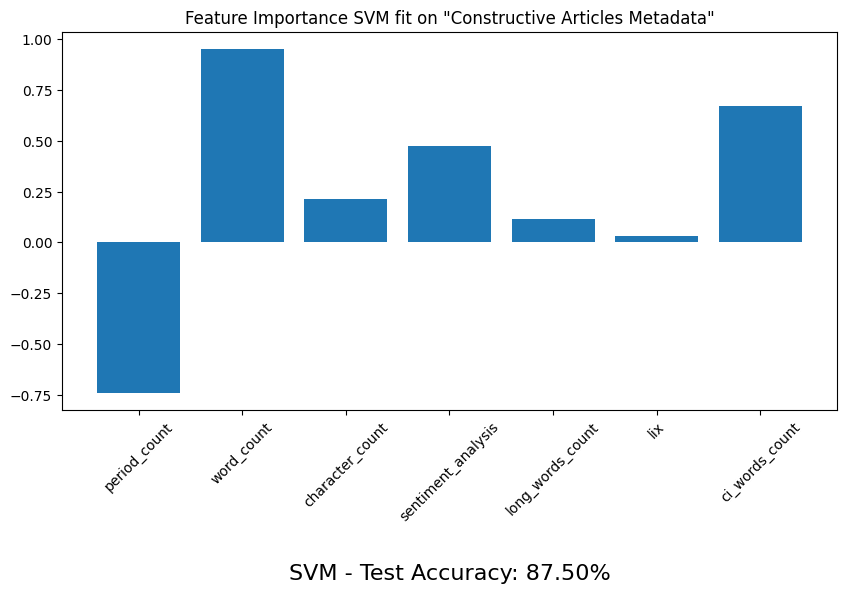

In [15]:
# Feature importances on best SVM fit
plot_feature_importance(svm_best_fit, X_test, y_test)

Feature: 0, Score: 0.00187
Feature: 1, Score: 0.10670
Feature: 2, Score: 0.29382
Feature: 3, Score: 0.16843
Feature: 4, Score: 0.00803
Feature: 5, Score: 0.12024
Feature: 6, Score: 0.30091


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


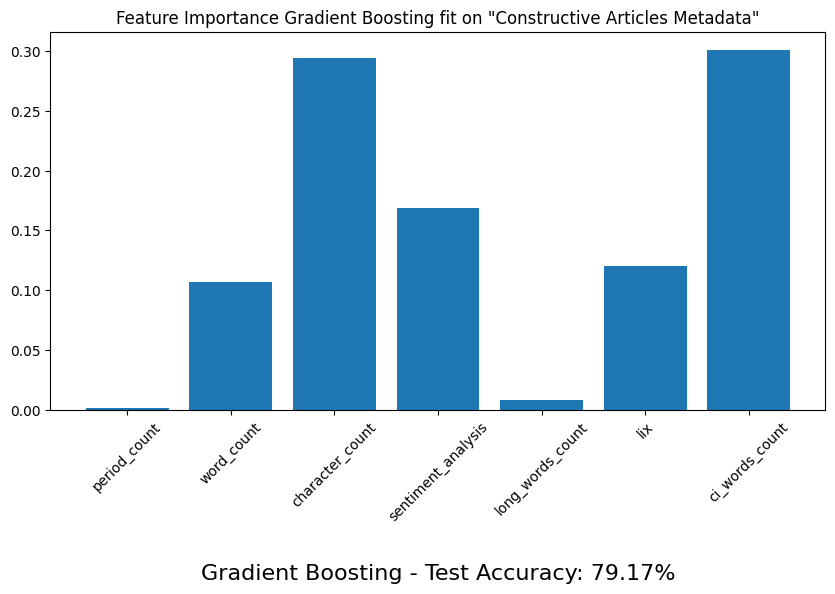

In [16]:
# Feature importances on best Gradient Boost fit
plot_feature_importance(gb_optimized, X_test, y_test)

Feature: 0, Score: 0.07855
Feature: 1, Score: 0.19028
Feature: 2, Score: 0.17814
Feature: 3, Score: 0.15572
Feature: 4, Score: 0.14765
Feature: 5, Score: 0.07385
Feature: 6, Score: 0.17581


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


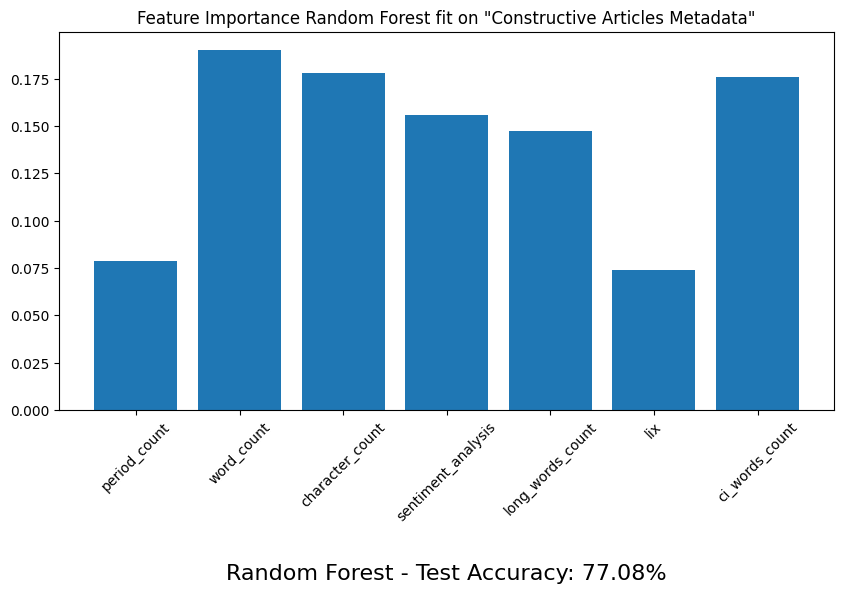

In [17]:
# Feature importances on best Random Forest fit
plot_feature_importance(rf_optimized, X_test, y_test)

Feature: 0, Score: -0.36045
Feature: 1, Score: 0.83396
Feature: 2, Score: 0.36033
Feature: 3, Score: 0.49019
Feature: 4, Score: -0.22580
Feature: 5, Score: 0.40074
Feature: 6, Score: 0.89348


/home/esben/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


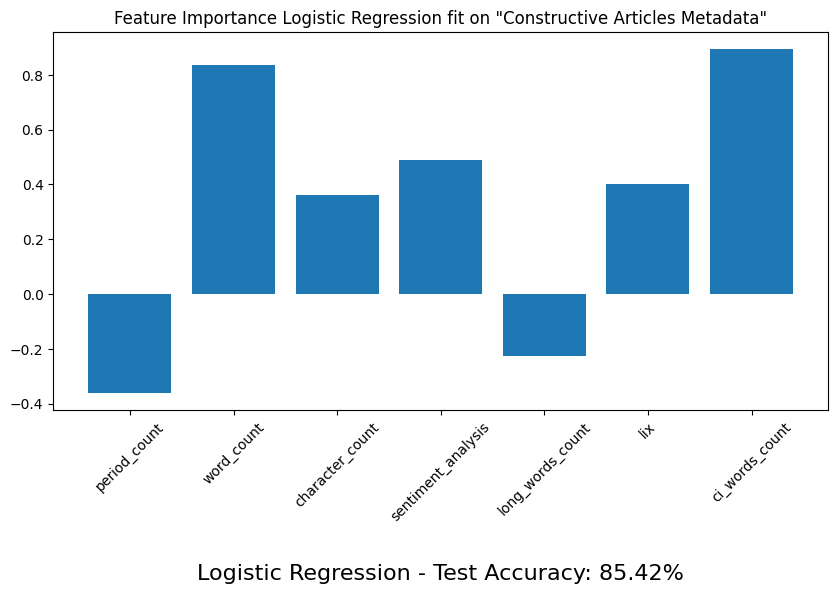

In [18]:
# Feature importances on best Logistic Regression fit
plot_feature_importance(log_fit, X_test, y_test)